# How to transform a (kinky) square shape in 2D...

In [47]:
from numpy import array, identity as I
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from math import pi as π, cos, sin
from random import random

# A bit of randomness...
σ = lambda x = 1: 2*x*(random() - 0.5)

# Transformation of the polygon's vertices
transform = lambda P, points: array([P @ p for p in points])
# Homogeneous to Euclidean coordinates conversion
h2e = lambda X: array([x[:-1]/x[-1] for x in X])

# And here, anchored at the very origin, is our square with a kink shape...
sqwk = array([[0, 0, 1], [1, 0, 1], [1, 1, 1], [.25, .25, 1], [0, 1, 1]])
# ... t.b.t. (to be transformed)!

## ... with a little help of the mighty (not almighty!) **linear algebra**
The identity matrix $\mathbf{I}$
$$
\mathbf{I}=
\begin{bmatrix}
1 & 0 & 0\\
0 & 1 & 0\\
0 & 0 & 1
\end{bmatrix}
$$
can serve as a placeholder only here, but various variants of $3\times 3$ matrices will be used to transform vectors $\left[x, y, 1\right]^T$ (representing 2D points $\left[x, y\right]^T$ in homogenous coordinates):

In [48]:
# Identity transformation (a.k.a. "do nothing but with great style!")
sqwk = transform(I(3), sqwk)
# A homage to the brave Gaul! https://1drv.ms/i/s!ArXn9WU5UgjzmYdtYHyukpDGvxSkBg?e=X5pBuv and https://1drv.ms/i/s!ArXn9WU5UgjzrJ4QQ8nPLXAKyfNEKg?e=fKjjx2
VercingetorixI = h2e(sqwk)

## Translation/shift

Thanks to the homogeneous coordinates, shifting by a vector $\left[{\color{red}{k}}, {\color{blue}{l}}\right]^T$ is a linear operation:
$$
\mathbf{T}_{{\color{red}{k}}, {\color{blue}{l}}}=
\begin{bmatrix}
1 & 0 & {\color{red}{k}}\\
0 & 1 & {\color{blue}{l}}\\
0 & 0 & 1
\end{bmatrix}
$$

In [49]:
# Our k-square after translation by k and l...
k, l = 1.5 + σ(), 1 + σ()
T = I(3); _T = array([k, l])
T[:2, 2] = _T.T # Transposition seems superfluous here, but it's a good habit to

## Rotation

Here is a formula of a rotation matrix (by an angle ${\color{red}{\alpha}}$)
$$
\mathbf{R}_{\color{red}{\alpha}}=
\begin{bmatrix}
\cos{\color{red}{\alpha}} & -\sin{\color{red}{\alpha}} & 0\\
\sin{\color{red}{\alpha}} & \cos{\color{red}{\alpha}} & 0\\
0 & 0 & 1
\end{bmatrix}
$$
Observe that $\det(\mathbf{R}_{\color{red}{\alpha}}) = \cos^2{\color{red}{\alpha}} + \sin^2{\color{red}{\alpha}} = 1$:

In [50]:
# ... and after rotation by α degrees...
α = σ(30)*π/180
R = I(3); _R = array([[cos(α), -sin(α)],
                      [sin(α),  cos(α)]])
R[:2, :2] = _R

## Squeezing, stretching, shearing & scaling section – [Procrustes](https://en.wikipedia.org/wiki/Procrustes) would've loved it!

These matrices look s's''s'''straighforward:
$$
\mathbf{S}'_{{{\color{red}{k}},{\color{blue}{\kappa}}}}=
\begin{bmatrix}
{\color{red}{k}} & 0 & 0\\
0 & {\color{blue}{\kappa}} & 0\\
0 & 0 & 1
\end{bmatrix},\quad
\mathbf{S''_{\color{blue}{\kappa}}}=
\begin{bmatrix}
{\color{blue}{\kappa}} & 0           & 0\\
0      & {\color{blue}{\kappa}}^{-1} & 0\\
0 & 0 & 1
\end{bmatrix},\quad
\mathbf{S}'''_{{{\color{red}{k}},{\color{blue}{\kappa}}}}=
\begin{bmatrix}
1      & {\color{red}{k}} & 0\\
{\color{blue}{\kappa}} & 1      & 0\\
0 & 0 & 1
\end{bmatrix},\quad
\mathbf{S}_{{\color{red}s}}=
\begin{bmatrix}
{\color{red}{s}} & 0 & 0\\
0 & {\color{red}{s}} & 0\\
0 & 0 & 1
\end{bmatrix}
$$

In [51]:
#  See https://en.wikipedia.org/wiki/Transformation_matrix#/media/File:2D_affine_transformation_matrix.svg
#  and https://en.wikipedia.org/wiki/Transformation_matrix#/media/File:Perspective_transformation_matrix_2D.svg

# stretching "Quidquid latine dictum sit altum videtur!" (https://en.wikipedia.org/wiki/Latin_numerals)
k, κ = .5 + σ(.5), .5+ σ(.5)
S_prim = array([[k, 0, 0],
                [0, κ, 0],
                [0, 0, 1]])
# ... squeezing
S_bis = array([[1/κ, 0, 0],
               [0,   κ, 0],
               [0,   0, 1]])
# and shearing
S_ter = array([[1, k, 0],
               [κ, 1, 0],
               [0, 0, 1]])
# ... and just scaling, too
s = 1 + σ(.5)
S = I(3); _S = array([[s, 0],
                      [0, s]])
S[:2, :2] = _S

## Reflections (thnX, [Hauseholder](https://en.wikipedia.org/wiki/Alston_Scott_Householder)!)

It is not exactly obvious that this matrix implements reflection about the line from origin $(0, 0)$ through $({\color{red}{l_x}}, {\color{blue}{l_y}})$. 
It will be clear, however, once we derive a projection formula
$$
\mathbf{M}_{{\color{red}{l_x}},{\color{blue}{l_y}}}=\frac{1}{{\color{red}{l_x}}^2 + {\color{blue}{l_y}}^2}
\begin{bmatrix}
{\color{red}{l_x}}^2 - {\color{blue}{{l_y}}}^2 & 2{\color{red}{l_x}}\color{blue}{{l_y}} & 0\\
{2\color{red}{l_x}}\color{blue}{{l_y}} & {\color{red}{l_x}}^2 - {\color{blue}{{l_y}}}^2 & 0\\
0 & 0 & 1
\end{bmatrix}
$$

In [52]:
# Reflection:
lx, ly = 1 + σ(.25), 1 + σ(.25)
M = I(3)
_M = array([[lx**2 - ly**2,     2*lx*ly  ],
            [    2*lx*ly  , ly**2 - lx**2]])
_M = _M/(lx**2 + ly**2)
M[:2, :2] = _M

## ♫[♪And all that jazz♫](https://youtu.be/Xx_eoxvYvc8)♪ in a [single swing](#all-right-in-more-than-one-swing)!

Regardless of how many transformation we need to apply, we can always multiply them first to get a single transformation matrix
$$
X' = {\color{red}{\Theta}} X,\quad {\color{red}{\Theta}} = \mathbf{M}_{{\color{red}{l_x}},{\color{blue}{l_y}}}\cdot\mathbf{T}_{{\color{red}{k}},{\color{blue}{l}}} \cdot\mathbf{S}_{{\color{red}s}}\cdot\mathbf{R}_{\color{red}{\alpha}}\cdot\mathbf{S}'''_{{{\color{red}{k}},{\color{blue}{\kappa}}}}
$$
Remember, however, about the order: matrix multiplication is not commutative (in general).

In [53]:
# Feel free to further squeeze, stretch, shear the shape (and mix the order too)...
Θ = M@T@S@R@S_ter  # M@T@S@R@S_ter != S_ter@R@S@T@M, for instance!
sqwk = transform(Θ, sqwk)
VercingetorixII = h2e(sqwk)

# Projections
Perhaps surprisingly, given a form of the matrix of Hausholder, the perspective projection matrix 
$$
\mathbf{P}_{{\color{red}{a}}, {\color{blue}{b}}}=
\begin{bmatrix}
1 & 0 & 0\\
0 & 1 & 0\\
{\color{red}{a}} & {\color{blue}{b}} & 0
\end{bmatrix}
$$
that turns a homogeneous point $X'$ into its projection $X''$:
$$X'' = \mathbf{P}_{{\color{red}{a}}, {\color{blue}{b}}}X'$$
onto a line ${\color{red}{a}}x + {\color{blue}{b}}y = 1$ (with a center of the projection located at the origin $(0, 0)$),  is fairly simple.

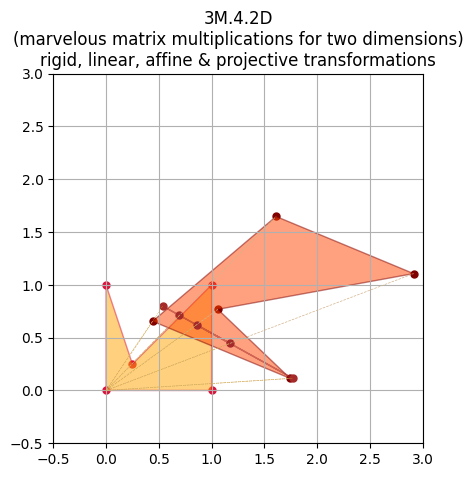

In [54]:
# Set the stage!
# https://www.geeksforgeeks.org/how-to-draw-shapes-in-matplotlib-with-python/
fig, ax = plt.subplots()
ax.set_xlim(-.5, 3); ax.set_ylim(-.5, 3); ax.set_aspect('equal'); plt.grid(True)

# Eventually, the final projection (a.k.a. casting a shadow)...
# https://youtu.be/27vT-NWuw0M, https://youtu.be/JK-8XNIoAkI and https://youtu.be/cTyNpXB92bQ
# which is a linear operation too and can be represented by a matrix as well:
# https://wrfranklin.org/pmwiki/Main/HomogeneousCoords
# The shadow of the final shape on the line Ax + By = 1
a, b = 1 + σ(.5), 1 + σ(.5)
P = array([[1, 0, 0],
           [0, 1, 0],
           [a, b, 0]])
shdw = transform(P, sqwk); VercingetorixIII = h2e(shdw)

# https://stackoverflow.com/questions/44526364/fill-matplotlib-polygon-with-a-gradient-between-vertices
for (Vercingetorices, edges, fills) in [(VercingetorixI, 'crimson', 'orange'),
                                        (VercingetorixII, 'maroon', 'orangered'),
                                        (VercingetorixIII, 'brown', 'red')]:
    polygon = Polygon(Vercingetorices, ec = edges, fc = fills, alpha = 0.5)
    ax.scatter(Vercingetorices[:, 0], Vercingetorices[:, 1], color = edges, s = 25)
    ax.add_patch(polygon)


# And the ♪♫Moonlight shadows♫♪... https://youtu.be/ixExC-Zgyzc and https://youtu.be/e80qhyovOnA of the vertices.
# Is that song about Évariste Galois https://en.wikipedia.org/wiki/%C3%89variste_Galois#Final_days?
for v, w in zip(sqwk, shdw):
    # Homogeneous to Euclidean coordinates
    (start, y), (u, r) = v[:-1]/v[-1], w[:-1]/w[-1]
    ax.plot((0, start), (0, y), c = 'tan', lw = .5, ls = 'dashed')
    ax.plot((0, u), (0, r), c = 'goldenrod', lw = .5, ls = 'dotted')

plt.title('3M.4.2D\n(marvelous matrix multiplications for two dimensions)\nrigid, linear, affine & projective transformations'); plt.show()

### Exemplum
"*[Where Eagles Dare](https://upload.wikimedia.org/wikipedia/en/8/8e/Where_Eagles_Dare_poster.jpg)*" — and where shifting the coordinates back is equivalent to multiplying them by the inverse of the matrix that has just shifted them forth...
$$
X''' = \left(\mathbf{T}^{-1}_{{\color{red}{k}},{\color{blue}{l}}} \cdot\mathbf{R}_{\color{red}{\alpha}} \cdot\mathbf{T}_{{\color{red}{k}},{\color{blue}{l}}}\right)X
$$
Note the order — and follow it!

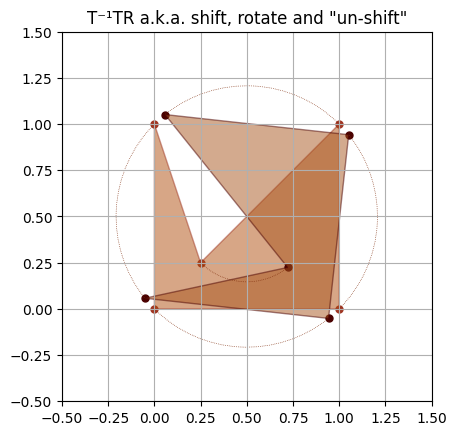

In [61]:
from numpy import linalg as la
## How to rotate around an arbitrary point (x, y) in 2D (like e.g. an image around its center):
sqwk = array([[0, 0, 1], [1, 0, 1], [1, 1, 1], [.25, .25, 1], [0, 1, 1]])
# shift towards center
k, l = -.5, -.5
T = I(3); _T = array([k, l])
T[:2, 2] = _T.T # Transposition seems superfluous here, but it's a good habit to
# rotate around the origin by a random angle (but limited for the sake of presentation clarity)
α = (45 - σ(45))*π/180
R = I(3); _R = array([[cos(α), -sin(α)],
                      [sin(α),  cos(α)]])
R[:2, :2] = _R
# and shift back
# ... (its matrix is already here, isn't it?)

img = transform(la.inv(T)@R@T, sqwk) # Caveat emptor: note the order ("Last will be first!", Mt, 19:30 ;)!
Kajko, Kokosz = h2e(sqwk), h2e(img)  # https://pl.wikipedia.org/wiki/Kajko_i_Kokosz ← https://en.wikipedia.org/wiki/Asterix (and Obelix)

# Let's draw'em all! (these guys (and Gauls) are from comics): ♪♫ https://youtu.be/zprXhDbVRvY ♫♪ ("Rysunkowa Postać", by Lady Pank)
from matplotlib.patches import Arc
from numpy import degrees, arctan2
fig, ax = plt.subplots()
ax.set_xlim(-.5, 1.5); ax.set_ylim(-.5, 1.5); ax.set_aspect('equal'); plt.grid(True)
for (wojowie, edges, fills) in [(Kajko, 'xkcd:brick', 'xkcd:burnt sienna'),
                                (Kokosz, 'xkcd:mahogany', 'xkcd:sienna')]:
    polygon = Polygon(wojowie, ec = edges, fc = fills, alpha = 0.5)
    ax.scatter(wojowie[:, 0], wojowie[:, 1], color = edges, s = 25)
    ax.add_patch(polygon)

#... and how they turn from one to the other...
center = [-k, -l]
for start, end in zip(Kajko, Kokosz): # Co-piloted by Bing (no, not Crosby!)
    # Calculate the center and radius
    r = la.norm(start - center)
    # Calculate the angles
    α, β = degrees(arctan2(start[1] - center[1], start[0] - center[0])), degrees(arctan2(end[1] - center[1], end[0] - center[0]))
    arc = Arc(center, 2*r, 2*r, angle = 0, theta1 = α, theta2 = β, ec = 'xkcd:reddish brown', lw = .5, ls = 'dotted')
    ax.add_patch(arc)

plt.title('T⁻¹TR a.k.a. shift, rotate and "un-shift"'); plt.show()

——————————————————————————————————————
### All right, in more than one swing...
1. Multiplication of all these matrices — done once and (like ♫[♪...the justice♫](https://youtu.be/2dXB-YBSFsQ?t=1023)♪) for all!
2. Actual multiplication (done for each point!!)